# 02. Neural Network classification with PyTorch

Classification is a problem of predicting wether some instance belongs to one class or another (prediction).

## 1. Make classification data and get it ready

In [28]:
import sklearn 

In [29]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [30]:
len(X), len(y)

(1000, 1000)

In [31]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of X: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of X: [1 1 1 1 0]


In [32]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [33]:
# Make a dataframe
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


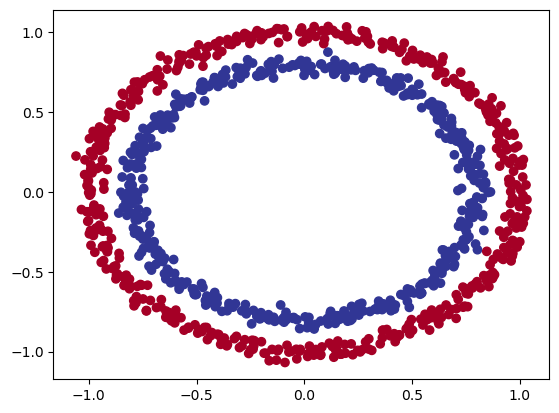

In [34]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

__Note__: The data that we are referring to is usually called a toy dataset, a dataset that is small enough to experiment, but sizeable enough to practice the fundamentals.

### 1.1 Check input and output shapes

In [35]:
X.shape, y.shape

((1000, 2), (1000,))

In [36]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and one for y: {y_sample}")
print(f"Shapes for ine sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and one for y: 1
Shapes for ine sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test splits

In [37]:
import torch

In [38]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [39]:
# split data into training and tests sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% of the data goes to the test split
                                                    random_state=42)

## 2. Building a model

Let's build a model to classify red and blue dots. 
To do so, we want to:
1. Setup device agnostic code so our code will run on a accelerator (GPU) if there is one
2. Construct a model (subclass `nn.Module`)
3. Define a loss function and optimizer
4. Define a training loop

In [40]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [41]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)
    
    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

We can also do the same as above using `nn.Sequential`.

nn.Sequential performs a forward pass computation of the input data through the layers in the order they appear.

In [42]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [43]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.5609],
        [ 0.6410],
        [ 0.2139],
        [ 0.6599],
        [-0.0041],
        [ 0.0465],
        [ 0.4446],
        [ 0.3048],
        [ 0.2236],
        [ 0.6439]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use?

Again... this is problem specific.

For example for regression you might want MAE or MSE 

For classification you might want binary cross entropy or categorical cross entropy.

And for optimizers, two of the most common and useful are SGD and Adam, but PyTorch has implemented a lot more.

* For the loss fucntion we're going to use `torch.nn.BCEWithLogitsLoss()`
* For a definition of what is LogitsLoss in deep learning

In [44]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [45]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.6892,  0.1853],
                      [ 0.4737,  0.6454],
                      [-0.3206,  0.6954],
                      [ 0.0188,  0.2963],
                      [ 0.5519, -0.1671]], device='cuda:0')),
             ('0.bias',
              tensor([-0.3876,  0.1728,  0.2215, -0.4256, -0.6164], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.1982,  0.2213,  0.1596,  0.0043, -0.4446]], device='cuda:0')),
             ('1.bias', tensor([0.0214], device='cuda:0'))])

In [46]:
# Calculate accuracy - TP/(TP + TN) - out of a 100 example, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train a model

To train our model, we going to need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward(Back-Propagation)
5. Optimizer step

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into prediction probabilities by passing them into some kind of activation function (e. g. sigmoid for binary classification and softmax for multiclass classification).

Then we can conver our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [47]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.5609],
        [ 0.6410],
        [ 0.2139],
        [ 0.6599],
        [-0.0041]], device='cuda:0')

In [48]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [49]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6367],
        [0.6550],
        [0.5533],
        [0.6592],
        [0.4990]], device='cuda:0')

For our prediction probability values, we need to perform a range -style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [50]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Remember, for getting rid of the extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0')

### 3.2 Building a training and a test loop

In [51]:
# For reproducibility
torch.cuda.manual_seed(42)

In [52]:
epochs = 1000

# Tracking different values
epoch_count = []
loss_values = []
acc_values = []
test_loss_values = []

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 1. forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Compute the loss and accuracy in the prediction
    # Our loss function in BCELogitsLoss, this function expects a logit and it passes the
    # sigmoid operation to it, in order to compute probability, so there is no need to pass y_preds
    loss = loss_fn(y_logits, y_train)
    accuracy = accuracy_fn(y_train, y_pred)                                

    # 3. Optimizier zero grad
    optimizer.zero_grad()

    # 4. Perform back-propagation on the loss with respect the parameters of the model
    loss.backward()

    # 5. Step optimizer
    optimizer.step() # The calculations accumulate in this operation, that is why, we use optimizer.zero_grad()

    # Testing
    model_0.eval() # now we change the model "mode" to testing
    with torch.inference_mode():
        # we pass the test data
        y_logits = model_0(X_test).squeeze()
        y_pred = torch.round(torch.sigmoid(y_logits))
        # we compute the loss with respect of the expected result
        test_loss = loss_fn(y_pred, y_test)
        test_accuracy = accuracy_fn(y_test, y_pred) 

    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.cpu().detach().numpy())
        test_loss_values.append(test_loss.cpu().detach().numpy())
        print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss} | Accuracy: {accuracy} % | test accuracy: {test_accuracy} %")

Epoch: 0 | Loss: 0.7082815170288086 | test loss: 0.7764456868171692 | Accuracy: 58.375 % | test accuracy: 54.0 %
Epoch: 10 | Loss: 0.7000155448913574 | test loss: 0.7734284996986389 | Accuracy: 53.125 % | test accuracy: 51.0 %
Epoch: 20 | Loss: 0.6968479156494141 | test loss: 0.7762215733528137 | Accuracy: 52.75 % | test accuracy: 49.0 %
Epoch: 30 | Loss: 0.6954495310783386 | test loss: 0.7726182341575623 | Accuracy: 52.0 % | test accuracy: 49.0 %
Epoch: 40 | Loss: 0.694721519947052 | test loss: 0.7802159190177917 | Accuracy: 52.0 % | test accuracy: 47.0 %
Epoch: 50 | Loss: 0.6942790150642395 | test loss: 0.7828136086463928 | Accuracy: 51.24999999999999 % | test accuracy: 46.0 %
Epoch: 60 | Loss: 0.6939776539802551 | test loss: 0.7766124606132507 | Accuracy: 51.37500000000001 % | test accuracy: 47.0 %
Epoch: 70 | Loss: 0.6937577128410339 | test loss: 0.7735118865966797 | Accuracy: 51.0 % | test accuracy: 47.5 %
Epoch: 80 | Loss: 0.6935912370681763 | test loss: 0.7704113125801086 | Accu

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anywhing...

So to inspect it, let's make some predictions and make them visual!

To do so, we're going to oiomport a function called `plot_decision_boundary()`

In [56]:
import requests
from pathlib import Path

# Download helper functions from learnpytoch repo if it is not already
# downloaded

if Path("helper_functions.py").is_file():
  print("helper functions file already dowloaded")
else:
  print("Download helper_fucntions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper functions file already dowloaded


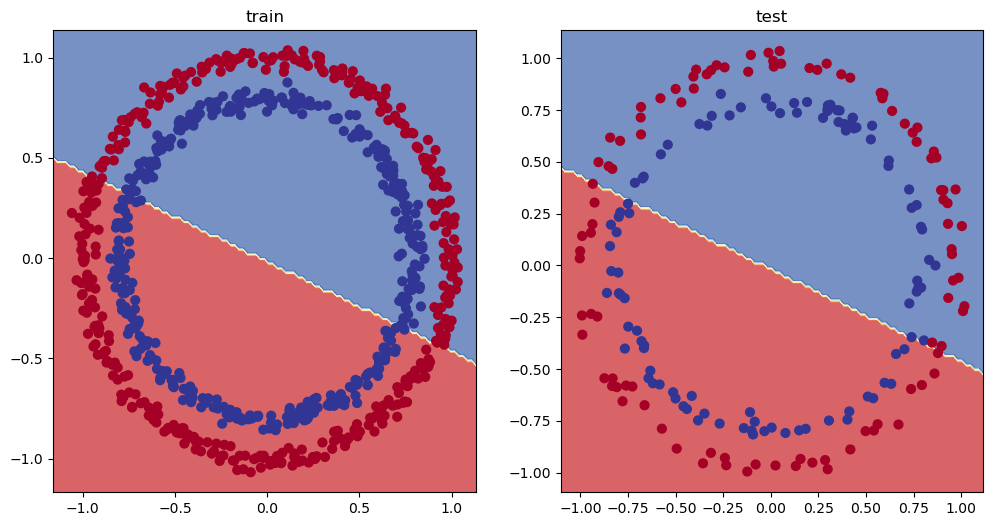

In [57]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)

# 5. Improving our model (from a model perspective)

* Add more hidden layers - give the model more chances to learn about the patters in the data

* Add more hidden units - go from 5 hidden units to 10 hidden units

* Fit for longer time (batches...)
* Changing the activation function
* Change the learning rate
* Change the loss function

In [58]:
class CircleModelV1(nn.Module):
	def __init__(self):
		super().__init__()
		self.layer_1 = nn.Linear(in_features=2, out_features=10)
		self.layer_2 = nn.Linear(in_features=10, out_features=10)
		self.layer_3 = nn.Linear(in_features=10, out_features=1)

	def forward(self, x):
		#z = self.layer_1(x)
		#z = self.layer_2(z)
		#z = self.layer_2(z)
		return self.layer_3(self.layer_2(self.layer_1(x))) # this way leverages speed ups where possible

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [59]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer

epochs = 1000

# Create a training loop

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training

for epoch in range(epochs):
	model_1.train() # set to training mode

	# forward pass
	y_logits = model_1(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits))

	# Calculate the loss/acc
	loss = loss_fn(y_logits, y_train)
	acc = accuracy_fn(y_train, y_pred)

	# optimizer zero grad
	optimizer.zero_grad()

	# do the back propagation based on the loss
	loss.backward()

	# optimizer step (gradient descent)
	optimizer.step()

    # Testing
	model_1.eval()
	with torch.inference_mode():
		# 1. forward pass
		test_logits = model_1(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))
		# 2. Calculate the loss
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_test, test_pred) 

	if epoch % 100 == 0:
		print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss} | Accuracy: {accuracy} % | test accuracy: {test_accuracy} %")

Epoch: 0 | Loss: 0.7045579552650452 | test loss: 0.7068033218383789 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 100 | Loss: 0.6930338740348816 | test loss: 0.6948144435882568 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 200 | Loss: 0.6929835081100464 | test loss: 0.6946735978126526 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 300 | Loss: 0.692980170249939 | test loss: 0.6946706175804138 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 400 | Loss: 0.6929798722267151 | test loss: 0.6946757435798645 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 500 | Loss: 0.6929798722267151 | test loss: 0.6946781873703003 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 600 | Loss: 0.6929798126220703 | test loss: 0.6946790814399719 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 700 | Loss: 0.6929798722267151 | test loss: 0.6946793794631958 | Accuracy: 51.0 % | test accuracy: 46.0 %
Epoch: 800 | Loss: 0.6929798722267151 | test loss: 0.6946795582771301 | Accuracy: 51.0 % | test acc

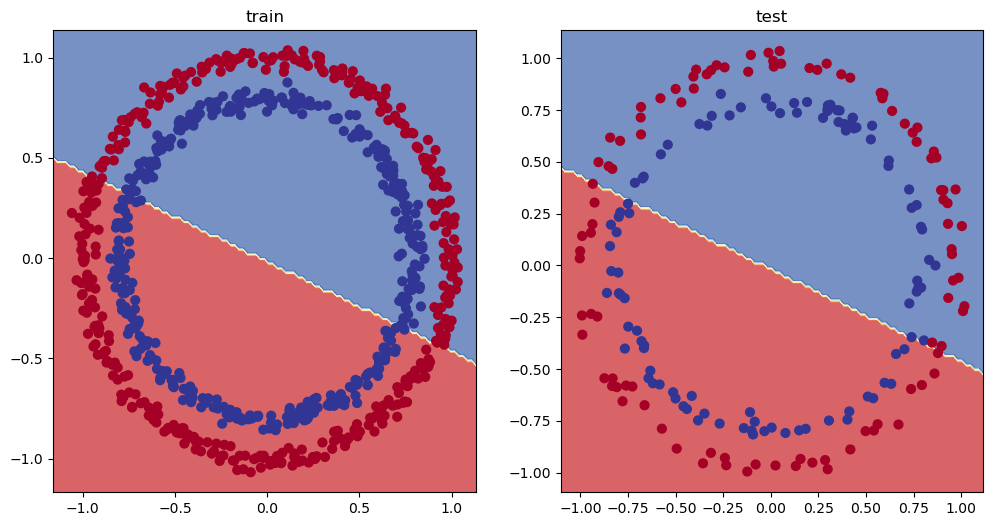

In [60]:
# Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)


## 6. The missing piece of our model: non-linearity

"What patterns could ypu draw if you were given an infinite amount of a straight and non-linearity lines?"

Or in machine learning terms, an infinite (but really it is finite) set of non-linear functions

### 6.1 Recreating non-linear data (red and blue circles)

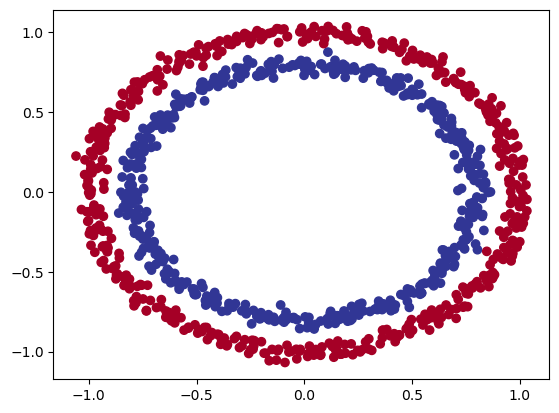

In [61]:
# Make and plot data
import matplotlib.pylab as plt
from sklearn.datasets import make_circles

n_samples=1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [62]:
# Convert data to tensors, then split data into train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], X_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]))

### 6.2 building a model with non--linearity

* Linear = straight lines
* Non-linear = _not_ straight lines

In [63]:
# Build a model with non-linear

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, X):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(X)))))
    
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [64]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation function built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)


In [65]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train 
epochs = 1000

# Create a training loop
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training
for epoch in range(epochs):
	model_3.train() # set to training mode

	# forward pass
	y_logits = model_3(X_train).squeeze()
	y_pred = torch.round(torch.sigmoid(y_logits))

	# Calculate the loss/acc
	loss = loss_fn(y_logits, y_train)
	acc = accuracy_fn(y_train, y_pred)

	# optimizer zero grad
	optimizer.zero_grad()

	# do the back propagation based on the loss
	loss.backward()

	# optimizer step (gradient descent)
	optimizer.step()

  	# Testing
	model_3.eval()
	with torch.inference_mode():
		# 1. forward pass
		test_logits = model_3(X_test).squeeze()
		test_pred = torch.round(torch.sigmoid(test_logits))
		# 2. Calculate the loss
		test_loss = loss_fn(test_logits, y_test)
		test_acc = accuracy_fn(y_test, test_pred) 

	if epoch % 100 == 0:
		print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss} | Accuracy: {acc} % | test accuracy: {test_acc} %")


Epoch: 0 | Loss: 0.6929463148117065 | test loss: 0.6931881308555603 | Accuracy: 50.0 % | test accuracy: 50.0 %
Epoch: 100 | Loss: 0.691152811050415 | test loss: 0.6910240054130554 | Accuracy: 52.87500000000001 % | test accuracy: 52.5 %
Epoch: 200 | Loss: 0.6897744536399841 | test loss: 0.6893961429595947 | Accuracy: 53.37499999999999 % | test accuracy: 55.00000000000001 %
Epoch: 300 | Loss: 0.6879494190216064 | test loss: 0.6872316598892212 | Accuracy: 53.0 % | test accuracy: 56.00000000000001 %
Epoch: 400 | Loss: 0.6851678490638733 | test loss: 0.6841148734092712 | Accuracy: 52.75 % | test accuracy: 56.49999999999999 %
Epoch: 500 | Loss: 0.6810224652290344 | test loss: 0.6794120669364929 | Accuracy: 52.75 % | test accuracy: 56.49999999999999 %
Epoch: 600 | Loss: 0.675148606300354 | test loss: 0.6728507876396179 | Accuracy: 54.50000000000001 % | test accuracy: 56.00000000000001 %
Epoch: 700 | Loss: 0.6665886640548706 | test loss: 0.6632164716720581 | Accuracy: 58.375 % | test accuracy:

In [66]:
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test.to(device)))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

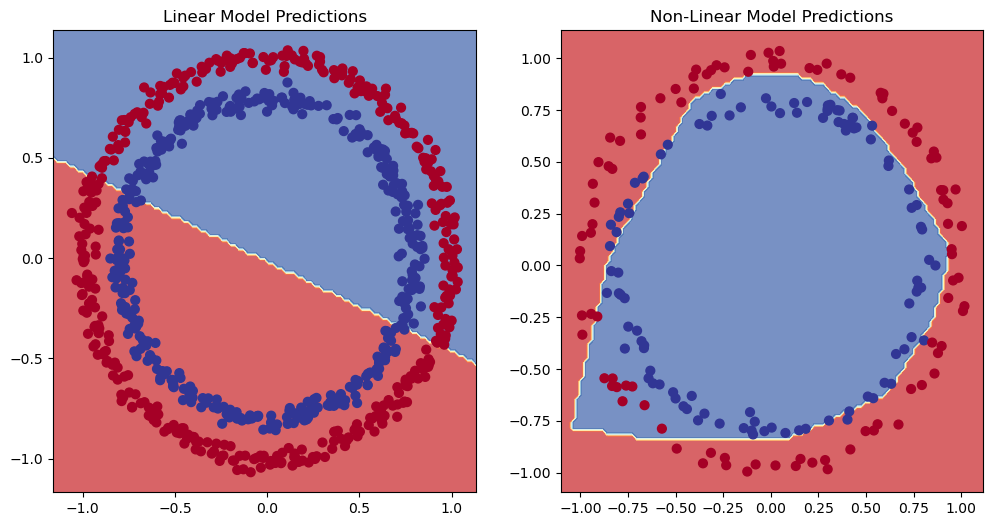

In [67]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Linear Model Predictions")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Non-Linear Model Predictions")
plot_decision_boundary(model_3, X_test, y_test)

### 6.3 Improving the results of our model

We are going to create a model that has an extra hidden layer and, for each layer, we will double the units from 10 to 20.
Also we are going to increase the number of epochs and also change the activation functions from ReLU to sigmoid.

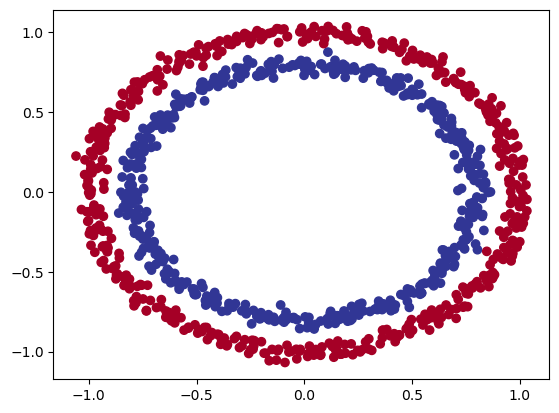

In [68]:
# Make and plot data
import matplotlib.pylab as plt
from sklearn.datasets import make_circles

n_samples=1000

X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [69]:
# Convert data to tensors, then split data into train and test splits

import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:5], X_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]))

In [70]:
class CircleModelV3(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.layer_1=nn.Linear(in_features=2, out_features=7)
        self.layer_2=nn.Linear(in_features=7, out_features=15)
        self.layer_3=nn.Linear(in_features=15, out_features=7)
        self.layer_4=nn.Linear(in_features=7, out_features=1)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        return self.layer_4(self.sigmoid(self.layer_3(self.sigmoid(self.layer_2(self.sigmoid(self.layer_1(x)))))))

# We instanciate the model
model_3_2 = CircleModelV3().to(device)

print(model_3_2)

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=7, bias=True)
  (layer_2): Linear(in_features=7, out_features=15, bias=True)
  (layer_3): Linear(in_features=15, out_features=7, bias=True)
  (layer_4): Linear(in_features=7, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [71]:
# we create the optimizers and the loss function
optimizer = torch.optim.Adam(model_3_2.parameters(), lr=0.01)

loss_fn = nn.BCELoss()

In [72]:
# we fix the seed for reproducibility
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [ ]:
# Create the training loop

epochs = 1000

X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

for epoch in range(epochs):
    # set model to train mode
    model_3_2.train()

    # make prediction
    y_sig = model_3_2(X_train)
    y_pred = torch.round(y_sig)

    # compute loss and accuracy
    loss = loss_fn(y_sig, y_train)
    acc = accuracy_fn(y_train, y_pred)

    # reset the value of the gradients to zero
    optimizer.zero_grad()

    # we compute the backpropagation based on the loss
    loss.backward()

    # based on the lr we compute the gradient descend
    optimizer.step()

    # evaluation mode
    model_3_2.eval()
    with torch.inference_mode():
        # make prediction (forward pass)
        y_sig = model_3_2(X_test)
        y_pred = torch.round(y_sig)

        # compute loss and acc
        test_loss = loss_fn(y_sig, y_test)
        test_acc = accuracy_fn(y_test, y_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | test loss: {test_loss} | Accuracy: {acc} % | test accuracy: {test_acc} %")

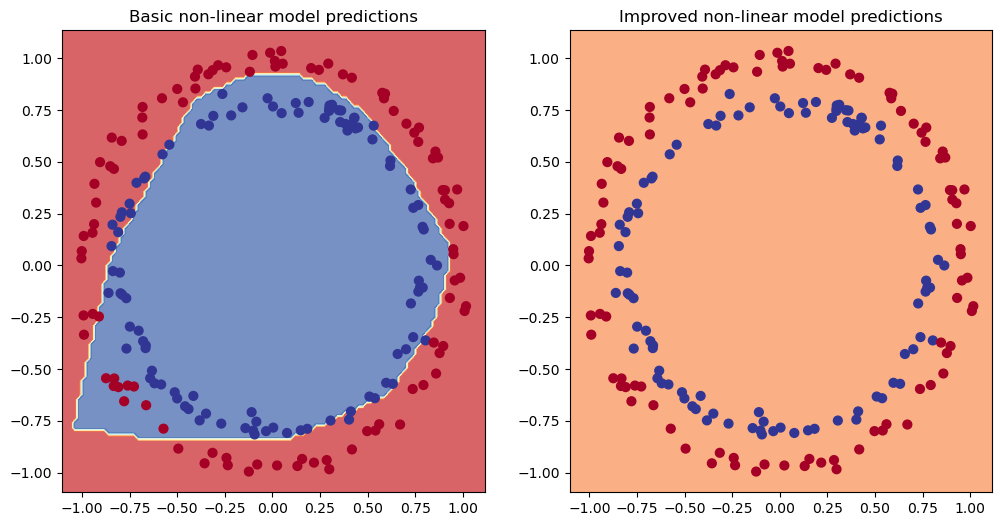

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Basic non-linear model predictions")
plot_decision_boundary(model_3, X_test, y_test)
plt.subplot(1,2,2)
plt.title("Improved non-linear model predictions")
plot_decision_boundary(model_3_2, X_test, y_test)